# Programming for Data Analysis Assignment 2020

## Table of contents
1. [Purpose of numpy.random package](#purpose)

2. [Use of Simple random data and Permutations functions](#use1)

    2.1 [Simple random data](#simple) 
    
    2.2 [Permutations](#permutations) <br>

2. [Use and purpose of Distributions functions](#use2)

    3.1. [Binomial](#binomial)
    
    3.2. [Uniform](#uniform)
     
    3.3. [Normal](#normal)
    
    3.4. [Log-normal](#lognormal)
    
    3.5. [Exponential](#exponential)
    
    3.6. [Student's t](#student)
    
    3.7. [Chi-squared](#chi)
    
4. [Seeds](#seeds)

5. [References](#references)

## Purpose of numpy.random package <a name="purpose"></a>
The numpy.random package is used to generate numpy arrays of pseudo-random numbers, i.e., numbers which appear to be randomly generated numbers but are actually generated using non-random (deterministic) means [1](#1), specifically using the Mersenne-Twister algorithm [2](#2). These are innumerable applications for these numbers in science and mathematics. For instance, in machine learning one is often required to split data into train and test sets and the data should be split randomly.

## Use of Simple random data and Permutations functions <a name="use1"></a>
### Simple random data <a name="simple"></a>
The Simple random data functions consist of the **integers**, **random**, **choice** and **bytes** functions [3](#3). 
#### Integers <a name="integers"></a>
**integers** returns a list of pseudo-random integers in a certain range and returns the list as a numpy array. The range is defined by a low value and a high value input in the function. For instance, to generate a numpy array of 10 pseudo-random integers between 2 and 5:

In [1]:
# Generator contains methods for generating random numbers, 
# PCG64 (Permuted Congruential Generator 64 bit) 
# is the bit generator for the PCG64 
# pseudo-random generator, SeedSequence generates
# the initial value (seed) for the pseudo
# random number generator
from numpy.random import Generator, PCG64, SeedSequence
# the initial state sg is set
sg = SeedSequence(1234)
# the seed is extracted from the initial state
seed = sg.spawn(0)
# the generator rg is generated using
# PCG64 and the seed
rg = Generator(PCG64(seed)) 
# a list of random integers is generated in the range (2, 5)
integer_list = rg.integers(low=2, high=5, size=10)
print(integer_list)

[4 3 3 2 2 2 2 2 2 4]


#### Random <a name="random"></a>
**random** performs a similar function to **integers** except it returns a numpy array of pseudo-random floats in a certain range rather than integers. For instance, to generate a numpy array of 10 pseudo-random floats between 2 and 5:

In [2]:
float_list = (5-2) *rg.random(10) + 2
print(float_list)

[4.73826673 3.81990733 4.18848968 3.63087497 4.80521727 4.44756066
 2.0082155  4.57221283 2.10075673 4.18896634]


The max and min values for the **random** function are 0 and 1. To get floats between 2 and 5, you have to transform the data using the formula:<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(**b**-**a**) **rg.random(10)** + **a** <br>
where b is the max value of the range (5 in this instance), a is the min value in the range (2 in this instance). a and b are also floats.

#### Choice <a name="choice"></a>
**choice** selects a number of elements from a numpy array in a random order. Elements may be duplicated if the same element is selected more than once randomly. For instance, to randomly select 5 values from a numpy array of the first 10 numbers (0-9):

In [3]:
# get the numpy package to generate
# non-random numbers
import numpy as np
# numpy array of numbers from 0 to 10
ten_list = np.arange(10)
# five_list is a random selection of 
# 5 elements from ten_list
five_list = rg.choice(ten_list, size=5)
print(ten_list, five_list)

[0 1 2 3 4 5 6 7 8 9] [8 1 0 8 0]


#### Bytes <a name="bytes"></a>
**bytes** returns a string of random bytes. For instance, to generate a string of 10 bytes:

In [4]:
rg.bytes(10)

b'\xd93\x9d\x8a8\x12\x95\x14 \xeb'

### Permutations <a name="permutations"></a>
#### Shuffle <a name="shuffle"></a>
**shuffle** rearranges an input numpy array randomly. The function does not return a value, instead it rearranges the input array "in-place" (i.e. the original input array is changed). For instance, to randomly rearrange a numpy array of the first 10 numbers (0-9):

In [5]:
ten_list = np.arange(10)
print(ten_list)
# shuffle original ten_list in-place
rg.shuffle(ten_list)
print(ten_list)

[0 1 2 3 4 5 6 7 8 9]
[4 6 5 2 3 9 7 0 8 1]


#### Permutation <a name="permutation"></a>
**permutation** is very similar to **shuffle**, except that it does not rearrange the input array in-place, the original input array is unchanged. Instead, it returns a new numpy array which consists of randomly rearranged elements of the input array. For instance, to generate a numpy array of the randomly rearranged numpy array of the first 10 numbers (0-9):

In [6]:
ten_list = np.arange(10)
print(ten_list)
# permuted is the shuffled ten_list
permuted = rg.permutation(ten_list)
print(permuted, ten_list)

[0 1 2 3 4 5 6 7 8 9]
[1 0 4 7 8 6 9 2 3 5] [0 1 2 3 4 5 6 7 8 9]


## Use and purpose of Distributions functions <a name="use2"></a>
### Binomial <a name="binomial"></a>
The Binomial distribution is a discrete-binary probability distribution with only two outcomes: 0 and 1 [4](#4). An experiment is performed n times and the success or failure of each experiment is represented as 0 or 1. The success probability is represented as p. The probability of failure is thus 1-p (because the probability of failure added to the probability of success has to be 1). The mean is np (the median and mode are more complicated and have multiple formulae).
The binomial distribution has many uses, one of which is binary classification models in machine learning (i.e., true or false, yes or no output).
The purpose of the **binomial** function is to generate a numpy array of floats using this distribution. For instance, to generate 100000 binomially distributed random numbers with n=1 and p = 0.3333 (note, when n=1 the binomial distribution equals the Bernoulli distribution):

In [7]:
b = rg.binomial(1, 0.3333, size=100000)
print(b)
# mean of b
print(np.mean(b))
# size of b
print(len(b))

[0 0 1 ... 0 1 1]
0.33349
100000


The **binomial** function returns integers as the binomial distribution is discrete.
A visual representation of **binomials**'s functionality is shown as follows:

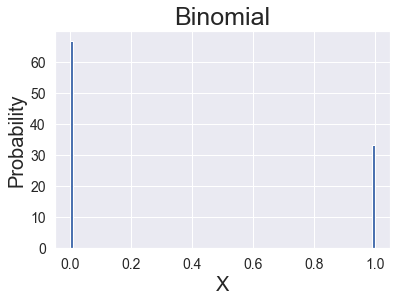

In [8]:
# to generate plots using pyplot from matplotlib
import matplotlib.pyplot as plt
# seaborn makes the plots look nicer
import seaborn as sns

# create grid for pyplots from seaborn
sns.set()

# This creates histogram plots
def plot_hist_of_dist(input_sample, x_label, y_label, dist_name, bins_no):
    # takes the input sample, number of bins and sets density=True to trace a 
    # good fit for a probability density function to the data.
    count, bins, ignored = plt.hist(input_sample, bins_no, density=True)

    # Title of the histogram plot
    plt.title(dist_name, fontsize=25)
    
    # the x label of histogrm
    plt.xlabel(x_label, fontsize=20)
    
    # the y label of histogram
    plt.ylabel(y_label, fontsize=20)
    
    # change size of ticks of x and y axes
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

    # show the plot of bins and histogram plot on same graph
    plt.show()

# show histogram of binomially generated numbers
plot_hist_of_dist(b, "X", "Probability", "Binomial", 100)

Where X is a variable indicating a point along the interval [0,1]. As can be seen from the histogram, approximately 66% of the values are at 0 and 33% are at 1.
Another real world application of the binomial distribution are vaccines. Either the vaccine was successful (1) or failed (0) at immunising against a particular disease. For instance, if a new vaccine is 90% successful at immunising against coronavirus with the population being immunised equals 2 million:

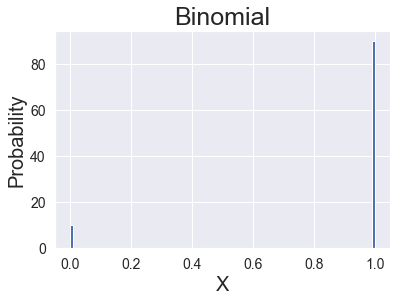

In [9]:
b2 = rg.binomial(1, 0.9, size=2000000)
plot_hist_of_dist(b2, "X", "Probability", "Binomial", 100)

As can be seen from the histogram, 90% of the trials are successful and 10% are failures.

### Uniform <a name="uniform"></a>
The uniform distribution is a probability distribution where each segment of the interval where the distribution is defined on has equal probability with any other segment of the interval. The mean of the distribution is the midpoint of the interval and equals the median. The mode is any value in the interval.
The uniform distribution has many uses, one of which is generating numbers for Monte Carlo simulations.
The purpose of **uniform** is to generate a numpy array of floats using this distribution. For instance, to generate 100000 uniformly distributed random numbers greater than or equal to 2 and less than 5:

In [10]:
u = rg.uniform(2, 5, 100000)
print(u)
# mean and median should equal
print(np.mean(u))
print(np.median(u))
# 100000 number of samples
print(len(u))

[3.89149295 4.08897639 2.32912156 ... 4.85011903 2.55283662 3.78591512]
3.4969189521657715
3.4925199041571453
100000


The **uniform** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats. To generate integers from a discrete interval between 2 and 5, one should use the **integers** function described previously. **uniform** is very similar to the **random** function previously described.
A visual representation of **uniform**'s functionality is shown as follows:

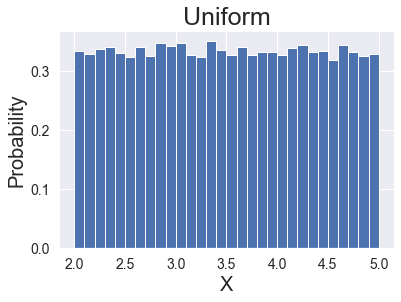

In [11]:
# Generate histogram of uniform distribution.
plot_hist_of_dist(u, "X", "Probability", "Uniform", 30)

Where X is a variable indicating a point along the interval [2,5). As can be seen from the histogram, the probability for each segment (divided here into bins of length 0.1) is approximately equal to the probability for the next segment, and so on for the entire interval [2,5).
Another real world application of the binomial distribution is the probability of drawing a card from a deck. Each card has equal probability of being drawn and there are 52 cards in a deck. If 100000 cards are drawn randomly from a deck of cards in a casino over the course of a year, the distribution will be as follows:

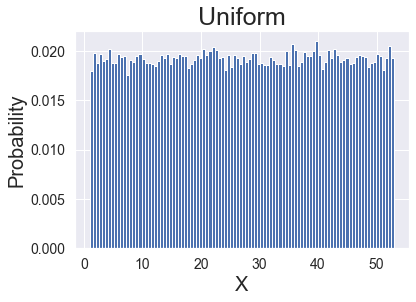

In [22]:
# sample drawn from numbers 1 (inclusive) - 53 (not inclusive)
u2 = rg.uniform(1, 53, 100000)
# histogram of frequency of card draws by card number
plot_hist_of_dist(u2, "Card number", "Probability", "Uniform", 100)

As can be seen from the histogram, each card has approximately equal probability of being drawn.

### Normal <a name="normal"></a>
The normal distribution is a probability distribution which has a peak around the mean or average value and decreases with distance from the mean. It is symmetric about this mean. In addition, the median (centre) and mode (most common) probability values are identical to the mean. Approximately 68% of the distribution is located in the interval [μ-σ, μ+σ] (where μ is the mean and σ is the standard deviation), 95% is located in the interval [μ -2σ, μ+2σ] and 99.7% is located in the interval [μ-3σ, μ+3σ]. 
One particular use for normal distributions is in least squares regression, which assumes the variables are normally distributed.
The purpose of the **normal** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 normally distributed random numbers between 2 and 5 with mean 2.5 and standard deviation 0.1:

In [12]:
n = np.random.default_rng().normal(2.5, 0.1, 100000)
print(n)
# mean and median should equal
print(np.mean(n))
print(np.median(n))
# number of samples generated
print(len(n))

[2.49411998 2.63057535 2.52313889 ... 2.43797912 2.38492204 2.51393747]
2.4994413292671314
2.498989305813393
100000


The **normal** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats.
A visual representation of **normal**'s functionality is shown as follows:

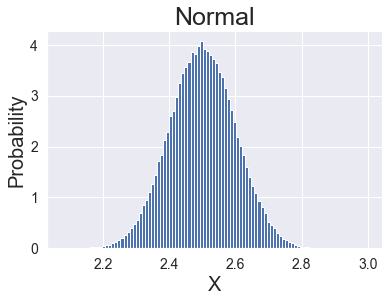

In [13]:
# histogram of normally generated numbers
plot_hist_of_dist(n, "X", "Probability", "Normal", 100)

As can be seen from the histogram, the probability for each segment (divided here into bins of length 0.1) is largest for the mean value X=2.5 and decreases gradually as X becomes smaller or larger than the mean. As X approaches 2.8 and 2.2. the probability becomes very small as 99.7% of the distribution is located in the interval [μ - 3σ, μ+3σ] which is [2.2, 2.8].
Another real world application of the normal distribution is the intelligence quotient or IQ [5](#ref5). Psychologists measure human intelligence using tests that are measured on an ordinal scale (which is not continuous) but the continuous normal distribution or bell curve is applied to the percentiles that are measured. For instance, someone at the 50th percentile of a test has an IQ of 100. Someone at the 84th percentile has an IQ of 115 and so on (the mean is 100 and the standard deviation is 15). An example of the IQ distribution for a population of 4.9 million is as follows:

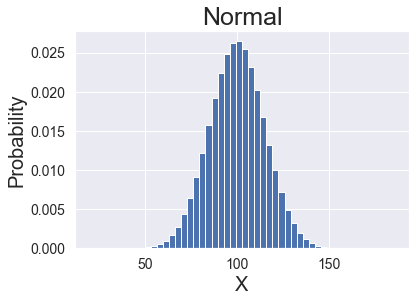

In [24]:
# normally distributed IQ's with mean 100 and stdev 15
n = np.random.default_rng().normal(100, 15, 49000000)
# histogram of IQ's
plot_hist_of_dist(n, "IQ", "Probability", "Normal", 50)

As can be seen from the histogram, 68% approx. of the values are between IQ's of 85 and 115, 95% approx are between 70 and 130 and 99.7% of the values are between 55 and 145. 

### Log-normal <a name="lognormal"></a>
The log-normal distribution is a distribution where its natural log (log<sub>e</sub>) is normally distributed. It is a left skewed distribution (i.e. the mode is less than the median which is less than the mean).
The distribution is frequently used to model when a mechanical unit fails due to fatigue.
The purpose of the **lognormal** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 lognormally distributed random numbers between 2 and 5 where the mean and standard deviation of the normally distributed variable are 2.5 and 0.25:

In [40]:
ln = rg.lognormal(2.5, 0.25, 100000)
print(ln)
# mean should be greater than median
print(np.mean(ln))
print(np.median(ln))
# number of samples taken
print(len(n))

[16.62153653 10.32798335  8.48679641 ... 17.00441778 13.28133166
 14.14425172]
12.561360416423407
12.158886676339975
49000000


The mean and median are equal to exp(μ + σ<sup>2</sup>/2) and exp(μ) respectively [6](#6), where μ and σ are the mean and standard deviation of the normally distributed variable.
The **lognormal** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats.
A visual representation of **lognormal**'s functionality is shown as follows:

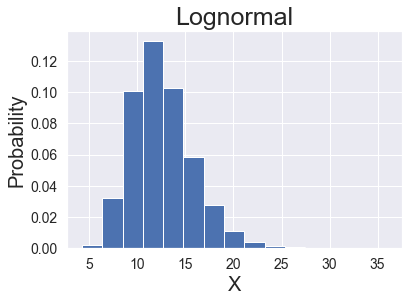

In [15]:
# histogram of lognormal distribution
plot_hist_of_dist(ln, "X", "Probability", "Lognormal", 15)

The left-skewed nature of the distribution can be seen from the histogram.
Another real world application of the log normal are stock prices [7](#7). It is assumed by financial analysts that the natural logarithm of stock prices are normally distributed, hence the stock prices themselves are lognormally distributed. For instance, the natural log of company's daily share price has an average of 50% of its current share price over 10 years (3650 days) and a standard deviation of 25% of its current share price will have a distribution as follows:

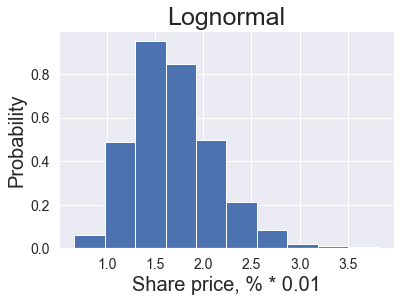

In [47]:
ln2 = rg.lognormal(0.5, 0.25, 3650)
plot_hist_of_dist(ln2, "Share price, % * 0.01", "Probability", "Lognormal", 10)

### Exponential <a name="exponential"></a>
The exponential distribution is a probability distribution which describes the time between events in a process where events happen continuously. The events are independent of each other and occur at a constant average rate. It is used in particle physics e.g., to describe the radioactive decay of particles. The distribution is left-skewed, so the mean is greater than the median which is greater than the mode.
The purpose of the **exponential** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 exponentially distributed random numbers with mean 2:

In [16]:
e = rg.exponential(2, size=100000)
print(e)
# mean is less than median
print(np.mean(e))
print(np.median(e))
# number of samples
print(len(e))

[2.10825937 1.27186075 1.00051231 ... 4.47744539 3.6089611  3.04082745]
2.0020755372164487
1.3851419641580076
100000


The **exponential** function assumes continuous not discrete probabilities and returns floats.
A visual representation of **exponential**'s functionality is shown as follows:

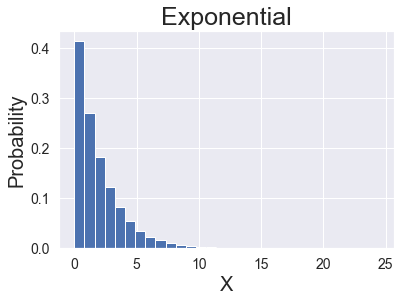

In [17]:
# histogram of exponential distribution
plot_hist_of_dist(e, "X", "Probability", "Exponential", 30)

Like the log normal distribution, it is left-skewed as can be seen from the histogram.
Another real world application of the exponential distribution is how long distance business phone calls last [8](#8), which generally follow an exponential distribution. For instance, a company modelling calls to and from the company over the course of a year will produce the following distribution if the mean of each phone call is 10 minutes:

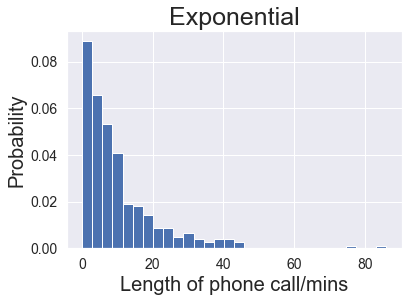

In [82]:
e2 = rg.exponential(10, size=365)
plot_hist_of_dist(e2, "Length of phone call/mins", "Probability", "Exponential", 30)

### Student’s t  <a name="student"></a>
The Student's t distribution is a probability distribution which is very similar to the normal distribution. It is used to estimate the mean of normally distributed populations when the sample size is small (it approaches the normal distribution as the sample size increases) and the standard deviation of the population is not known.
The distribution is often used in the Student' t-test, which estimates the likelihood of the mean of the sample differing from the mean of the population (one sample t-test) or estimates the likelihood of two population means differing, given two samples (two sample t-test).
The purpose of the **standard_t** function is to generate a Numpy array of floats using this distribution and, hence, to do t-tests. For instance, given a sample of the IQ's of 11 people (10 degrees of freedom), can we reject the null hypothesis that the mean of the sample is identical to the mean of the IQ's in general (which is 100)?

In [18]:
# example numpy array of IQ's
IQ_list = np.array([140, 99, 76, 120, 125, 156, 87, 111, 138, 105, 115])
# st is numpy array of samples taken from standard_t distribution with 10 degrees of freedom
st = np.random.standard_t(10, size=100000)
# mean of IQ_list
print(np.mean(IQ_list))
# standard deviation of IQ_list with 1 degree of freedom
print(IQ_list.std(ddof=1))
# difference between mean of IQ-list and population mean of IQ's (100)
# divided by the standard deviation over the square root of the size of IQ_list
t = (np.mean(IQ_list)-100)/(IQ_list.std(ddof=1)/np.sqrt(len(IQ_list)))
# p_value generated from summing up all values of st for which st<t 
# and dividing result by the size of st
print("The p-value is: " + str(np.sum(st<t) / float(len(st))))

115.63636363636364
23.732984335193613
The p-value is: 0.97318


So, the p-value is 0.974, which means there is a 2.6% chance that the mean of the sample (115.64) is the same as the population mean of 100, so the null hypothesis that they are the same is rejected (this process is simplified using the **stats** module from the **scipy** package). A visual representation of **standard_t**'s functionality is shown as follows:

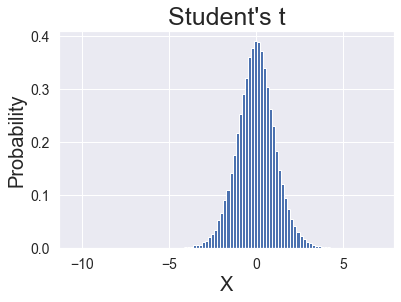

In [19]:
# histogram of Student's t distribution
plot_hist_of_dist(st, "X", "Probability", "Student's t", 100)

As can be seen from the histogram, the distribution resembles a normal distribution.
### Chi-squared <a name="chi"></a>
The chi-squared distribution comes from summing the square of multiple normally distributed random variables. This distribution is used for the Pearson's chi-squared test. This test compares two sets of data and calculates whether differences between expected and observed data are statistically significant.
The purpose of the **chisquare** function is to generate a Numpy array of floats from this distribution. For instance, to generate a Numpy array of 100000 floats with 2 degrees of freedom:

In [20]:
cq = np.random.chisquare(2,100000)

 A visual representation of **standard_t**'s functionality is shown as follows:

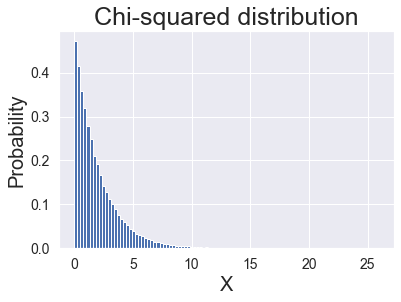

In [21]:
# histogram of Chi-squared distribution
plot_hist_of_dist(cq, "X", "Probability", "Chi-squared distribution", 100)

A real world application of the chi-squared distribution is performing a Chi-squared test to determine whether the location of the neighborhood of a type (or collar) of worker is due to chance [9](#9). The test can be performed as follows [10](#10).

In [52]:
# import pandas module
import pandas as pd
# for chi squared test
from scipy.stats import chi2_contingency
# define workers dataframe
workers = pd.DataFrame(
    # number of workers
    # different columns indicate different neighborhoods
    # different rows indicate different collars or types
    [
        [90,60,104,95],
        [30,50,51,20],
        [30,40, 45, 35],
    ],
    # define row labels
    index=["White collar","Blue collar", "No collar"],
    # define column labels
    columns=["A", "B", "C", "D"])
workers  

# Chi-squared statistic
print("The chi-squared statistic is: {}".format(chi2_contingency(workers)[0]))
# p-value
print("The p-value is: {}".format(chi2_contingency(workers)[1]))
# degrees of freedom
print("The no of degrees of freedom is: {}".format(chi2_contingency(workers)[2]))
# numpy array of expected values
print("The expected values are: \n{}".format(chi2_contingency(workers)[3]))

The chi-squared statistic is: 24.5712028585826
The p-value is: 0.0004098425861096696
The no of degrees of freedom is: 6
The expected values are: 
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


The p-value is 0.0041. This means that we can safely reject the null hypothesis that the location of certain types of worker is due to random chance.

## Seeds <a name="seeds"></a>
A seed specifies a starting point in a pattern that a computer uses to generate pseudorandom numbers. The seed is usually taken from the seconds on a computer's clock. [11](#11) This ensures that no two seeds are identical.
An example of a pattern is done using the irrational number pi (3.141592654...) [12](#12). The digits of pi have no regular pattern so pi is appropriate for pseudorandom number generation. An example pattern acting on pi is take the seed X, add it to 50 and use the (X+50)<sup>th</sup> digit of pi as the first random number. Then subtract 37 from that to get the second number, and so on. 
(Note: this is a simple example pattern, in practice computers use more complicated patterns based on the Bernoulli or Poisson distribution). <br>
While no two seeds are identical, they are preset initially when on is generating pseudorandom numbers. This is useful because if one has the seed for a particular set of pseudorandom numbers, they can replicate the exact same set of pseudorandom numbers for testing purposes. For instance, at the start of this Jupyter Notebook the numpy array *integer_list* was generated using the **integers** function. It can be generated again using the generator **rg** which has the same seed:

In [22]:
print(integer_list)
# initial seed sequence
sg = SeedSequence(1234)
# get seed from seed sequence
seed = sg.spawn(0)
# seed the generator
rg = Generator(PCG64(seed)) 
# generate new integer_list2 which should be identical to original integer_list
integer_list2 = rg.integers(low=2, high=5, size=10)
print(integer_list2)

# Compare two numpy arrays
comparison = integer_list == integer_list2
equal_arrays = comparison.all()
# Print Success! if equal
if(equal_arrays):
    print("Success!")

[4 3 3 2 2 2 2 2 2 4]
[4 3 3 2 2 2 2 2 2 4]
Success!


## References <a name="references"></a>
[1] Haahr, M., 2020. RANDOM.ORG - Introduction To Randomness And Random Numbers. [online] Random.org. Available at: <https://www.random.org/randomness/> [Accessed 26 October 2020].<a name="1"></a><br> 
[2] Sicara.ai. 2020. [online] Available at: <https://www.sicara.ai/blog/2019-01-28-how-computer-generate-random-numbers> [Accessed 26 October 2020].<a name="2"></a> <br> 
[3] Numpy.org. 2020. Random Generator — Numpy V1.19 Manual. [online] Available at: <https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator> [Accessed 26 October 2020].<a name="3"></a> <br>
[4] Medium. 2020. The Most Used Probability Distributions In Data Science. [online] Available at: <https://towardsdatascience.com/the-most-used-probability-distributions-in-data-science-5b3c11d34bfe> [Accessed 26 October 2020].<a name="4"></a> <br>
[5] Westga.edu. 2020. [online] Available at: <https://www.westga.edu/academics/research/vrc/assets/docs/the_normal_distribution_notes.pdf> [Accessed 19 November 2020]. <a name="5"></a> <br>
[6] Brilliant.org. 2020. Log-Normal Distribution | Brilliant Math & Science Wiki. [online] Available at: <https://brilliant.org/wiki/log-normal-distribution/> [Accessed 19 November 2020]. <a name="6"></a> <br>
[7] Dillhoefer, B., 2020. Lognormal Random Walk Model For Stock Prices Part 1 | Stockopter. [online] StockOpter. Available at: <https://stockopter.com/lognormal-random-walk-model-for-stock-prices-part-1/> [Accessed 19 November 2020]. <a name="7"></a> <br>
[8] Courses.lumenlearning.com. 2020. The Exponential Distribution | Introduction To Statistics. [online] Available at: <https://courses.lumenlearning.com/fscj-introstats1/chapter/the-exponential-distribution/> [Accessed 19 November 2020]. <a name="8"></a> <br>
[9] En.wikipedia.org. 2020. Chi-Squared Test. [online] Available at: <https://en.wikipedia.org/wiki/Chi-squared_test> [Accessed 19 November 2020]. <a name="9"></a> <br>
[10] Medium. 2020. Gentle Introduction To Chi-Square Test For Independence. [online] Available at: <https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95> [Accessed 19 November 2020]. <a name="10"></a> <br>
[11] Statistics How To. 2020. Random Seed: Definition - Statistics How To. [online] Available at: <https://www.statisticshowto.com/random-seed-definition/> [Accessed 26 October 2020].<a name="11"></a>  <br>
[12] McLoughlin, I. and McGinley, B., 2020. Programming for Data Analysis. [online] GMIT. Available at: <https://learnonline.gmit.ie/> [Accessed 26 October 2020].<a name="12"></a>